In [17]:
#Importamos la librerias necesarias
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from datetime import datetime
from datetime import date
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
%matplotlib notebook
#Importamos la base de datos que necesitamos
dataset = pd.read_csv('D:\INEI\Tesis\WEKA\Datos Convertidos\FAlumnoSocial.csv')
x = dataset.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]].values
dataset.describe()

,IdAlumno,NOMBREESCUELA,UBIGEONACIMIENTO,EDAD,DIRECCION,ESTADOCIVIL,DEUDA,PUNTAJEINGRESO,TIPOCOLEGIO,SEXO,REGIMENTENENCIAVIVIENDADONDEVIVE,VIVESUPADRE,VIVESUMADRE,PERSONASCONQUIENESVIVE,NIVELEDUCATIVOPADRE,NIVELEDUCATIVOMADRE,TRABAJASUPADRE,TRABAJASUMADRE,TIENECONOCIMIENTOSENCOMPUTACION,FINANCIAMIENTODESUSESTUDIOSUNIVERSITARIOS
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,0.919825,0.411079,0.944606,4.549563,1.533528,1.478134,1.215743,0.561224,0.553936,1.607872,0.931487,0.967930,1.212828,2.744898,2.686589,1.804665,1.759475,0.960641,1.762391
std,198.175427,1.099828,0.796045,0.814015,3.409693,0.834239,0.829363,0.766135,0.496599,0.497445,0.756015,0.252809,0.176315,0.823848,1.672603,1.567748,0.553456,0.508775,0.194589,0.518659
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,172.250000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,343.500000,0.000000,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000
75%,514.750000,2.000000,0.000000,2.000000,8.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000,1.000000,2.000000
max,686.000000,3.000000,2.000000,2.000000,9.000000,2.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,5.000000,5.000000,2.000000,2.000000,1.000000,2.000000


<IPython.core.display.Javascript object>


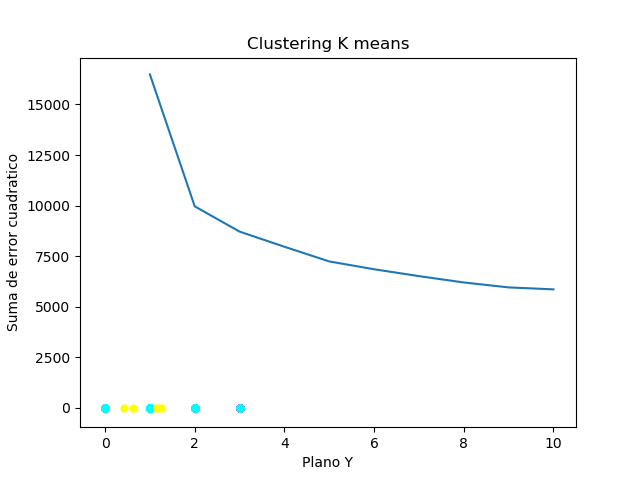

In [18]:
#Encontramos el numero optimo de cluster mediante el metodo del codo
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Gráficamos los resultados mediante una linea, Hacemos observacion del 'The elbow'
plot.plot(range(1, 11), wcss)
plot.title('Método del codo')
plot.xlabel('Número de Agrupaciones')
plot.ylabel('Suma de error cuadratico') #Suma de error cuadrático
plot.show()

In [19]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=0)
y = kmeans.fit_predict(x)
plot.scatter(x[y == 0,0], x[y == 0,1], s=25, c='red', label='Cluster 1')
plot.scatter(x[y == 1,0], x[y == 1,1], s=25, c='blue', label='Cluster 2')
plot.scatter(x[y == 2,0], x[y == 2,1], s=25, c='magenta', label='Cluster 3')
plot.scatter(x[y == 3,0], x[y == 3,1], s=25, c='cyan', label='Cluster 4')

plot.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=25, c='yellow', label='Centroides')
plot.title('Clustering K means')
plot.xlabel('Plano X')
plot.xlabel('Plano Y')
plot.show()

In [20]:
Sn = kmeans.fit_predict(x)
Sn

array([1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1,
       1, 0, 1, 3, 2, 1, 1, 3, 2, 1, 1, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3,
       2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 3, 2, 1,
       2, 2, 3, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1,
       3, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 3, 2, 2,
       3, 0, 1, 1, 1, 0, 2, 3, 2, 2, 2, 3, 2, 0, 1, 3, 1, 1, 3, 3, 2, 3, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 3, 3,
       3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 3,
       3, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3, 2, 2, 1, 0, 3, 2, 2, 1, 0, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 3, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 3, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2,
       1, 2, 1, 1, 2, 0, 3, 1, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1,
       2, 0,

In [21]:
dataset = dataset.assign(Cluster=Sn)
dataset.head()

,IdAlumno,NOMBREESCUELA,UBIGEONACIMIENTO,EDAD,DIRECCION,ESTADOCIVIL,DEUDA,PUNTAJEINGRESO,TIPOCOLEGIO,SEXO,...,VIVESUPADRE,VIVESUMADRE,PERSONASCONQUIENESVIVE,NIVELEDUCATIVOPADRE,NIVELEDUCATIVOMADRE,TRABAJASUPADRE,TRABAJASUMADRE,TIENECONOCIMIENTOSENCOMPUTACION,FINANCIAMIENTODESUSESTUDIOSUNIVERSITARIOS,Cluster
0,1,2,2,0,0,2,2,2,1,1,...,1,1,1,0,4,2,2,1,2,1
1,2,2,2,1,0,2,1,2,0,1,...,1,1,1,4,4,2,2,1,2,1
2,3,0,2,0,9,2,0,1,1,1,...,1,1,0,5,3,2,2,1,2,2
3,4,0,2,2,9,2,1,1,1,0,...,1,1,4,0,0,2,1,1,2,0
4,5,0,2,2,6,2,1,0,1,0,...,1,1,4,4,4,2,2,1,2,2


In [22]:
dataset.to_csv("D:\INEI\Tesis\CSocialAlumno.csv", sep=";")